# Install Libraries

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install tld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 18.2 MB/s eta 0:00:00


In [ ]:
!pip install whois

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for whois: filename=whois-0.9.27-py3-none-any.whl size=30469 sha256=83d605719f90cbac76a2e2ed4dae0aaad4a5c1d0a038318c2f8d531e0876b357
  Stored in directory: /root/.cache/pip/wheels/71/17/36/d62eb5bcc416650499a7259d584c11e4a778de5ce0e72a8dbf
Successfully built whois


In [ ]:
!pip install geocoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 8.0 MB/s eta 0:00:00


# Load and Combined Original Data
---
-- Generated --



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# https://data.mendeley.com/datasets/gdx3pkwp47/2

data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SafeNetAI/Dataset/raw_data/Original_Data/Webpages_Classification_test_data.csv', index_col=[0])

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SafeNetAI/Dataset/raw_data/Original_Data/Webpages_Classification_train_data.csv', index_col=[0])

In [ ]:
frames = [data1, data2]
data0 = pd.concat(frames)

In [ ]:
data0.to_csv('/content/drive/MyDrive/Colab Notebooks/SafeNetAI/Dataset/raw_data/complete_data.csv', index=False)

# Dataset Balancing
---
-- Generated --


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data_balancing = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SafeNetAI/Dataset/raw_data/complete_data.csv')

In [ ]:
filtered_data_bad = data_balancing[data_balancing['label'] == "bad"]
data_count = filtered_data_bad.shape[0]

In [ ]:
data_count

35315

In [ ]:
filtered_data_good = data_balancing[data_balancing['label'] == "good"]
filtered_data_good.shape[0]

1526619

In [ ]:
selected_good = filtered_data_good[:data_count]

In [ ]:
frames = [filtered_data_bad, selected_good]
balanced_data = pd.concat(frames)

In [ ]:
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reset the index
balanced_data.reset_index(drop=True, inplace=True)
balanced_data = shuffle(balanced_data)

In [ ]:
balanced_data.head()

,url,url_len,ip_add,geo_loc,tld,who_is,https,js_len,js_obf_len,content,label
54214,http://www.baycu.com/,21,25.186.78.91,United Kingdom,com,complete,no,77.0,0.000,Energy other natural bodies of water swarmed. ...,good
28168,http://www.massagefree.com/,27,198.111.100.80,United States,com,incomplete,no,369.0,214.020,whorehouse wanker nigger horn ribbed hooker fu...,bad
9293,http://www.bucksbrand.com/,26,149.52.223.47,United States,com,incomplete,no,592.2,497.448,niggles pornflick sooty bitchy japcrap vomit s...,bad
8312,http://www.sheridantaylor.com/,30,215.130.150.116,United States,com,incomplete,no,467.1,205.524,kunt goddamnes pussylicker bumfuck bast assklo...,bad
18796,http://www.eze-porn.com/pussy-pounding/,39,12.51.233.27,United States,com,incomplete,no,0.0,0.000,flydie assmunch fucks analannie ejaculation ch...,bad


In [ ]:
balanced_data.isnull().sum()

In [ ]:
count = balanced_data.label.value_counts()

In [ ]:
count

good    35315
bad     35315
Name: label, dtype: int64

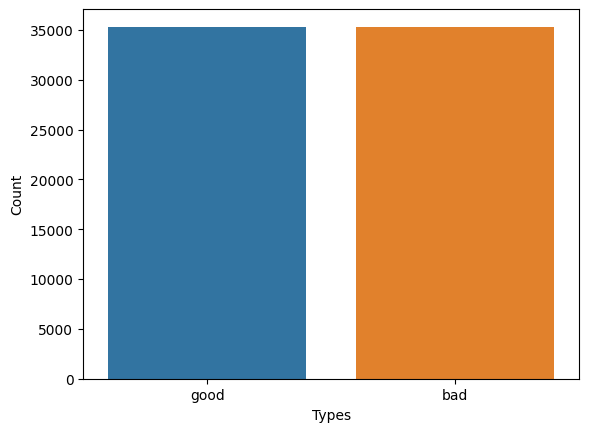

In [ ]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

In [ ]:
balanced_data.to_csv('/content/drive/MyDrive/Colab Notebooks/SafeNetAI/Dataset/raw_data/balanced_data.csv', index=False)

# Data Clearing
---
-- Generated --



In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
load_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SafeNetAI/Dataset/raw_data/balanced_data.csv')

In [ ]:
rem = {"label": {"good": 0, "bad": 1}}
load_data['label'] = load_data['label']
load_data = load_data.replace(rem)

In [ ]:
rem = {"who_is": {"incomplete": 0, "complete": 1}}
load_data['who_is'] = load_data['who_is']
load_data = load_data.replace(rem)

In [ ]:
rem = {"https": {"no": 0, "yes": 1}}
load_data['https'] = load_data['https']
load_data = load_data.replace(rem)

In [ ]:
# Convert IP address to numerical representation
load_data['ip_add'] = load_data['ip_add'].apply(lambda x: sum(int(digit) * (256 ** i) for i, digit in enumerate(x.split('.')[::-1])))

In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
load_data['geo_loc'] = label_encoder.fit_transform(load_data['geo_loc'])

In [ ]:
# Encode the target variable
load_data['tld'] = label_encoder.fit_transform(load_data['tld'])

In [ ]:
load_data

In [ ]:
load_data.to_csv('/content/drive/MyDrive/Colab Notebooks/SafeNetAI/Dataset/dataset.csv', index=False)

# Feature Engineering

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SafeNetAI/Dataset/dataset.csv')

In [ ]:
fields = ['url', 'ip_add', 'geo_loc', 'tld', 'who_is', 'https', 'label']

In [ ]:
data = data.loc[:, fields]

In [ ]:
data.head()

,url,ip_add,geo_loc,tld,who_is,https,label
0,http://www.baycu.com/,431640155,179,72,1,0,0
1,http://www.massagefree.com/,3329188944,180,72,0,0,1
2,http://www.bucksbrand.com/,2503270191,180,72,0,0,1
3,http://www.sheridantaylor.com/,3615659636,180,72,0,0,1
4,http://www.eze-porn.com/pussy-pounding/,204728603,180,72,0,0,1


In [ ]:
data['url'] = data['url'].replace('www.', '', regex=True)

In [ ]:
data.head()

,url,ip_add,geo_loc,tld,who_is,https,label
0,http://baycu.com/,431640155,179,72,1,0,0
1,http://massagefree.com/,3329188944,180,72,0,0,1
2,http://bucksbrand.com/,2503270191,180,72,0,0,1
3,http://sheridantaylor.com/,3615659636,180,72,0,0,1
4,http://eze-porn.com/pussy-pounding/,204728603,180,72,0,0,1


In [ ]:
feature = ['@','?','-','=','.','#','%','+','$','*','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))

In [ ]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [ ]:
data['digits']= data['url'].apply(lambda i: digit_count(i))

In [ ]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [ ]:
data['letters']= data['url'].apply(lambda i: letter_count(i))

In [ ]:
import re

In [ ]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

In [ ]:
data['shortings'] = data['url'].apply(lambda x: Shortining_Service(x))

<ipython-input-128-d14f9601ff3f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), linewidths=.5)


<Axes: >

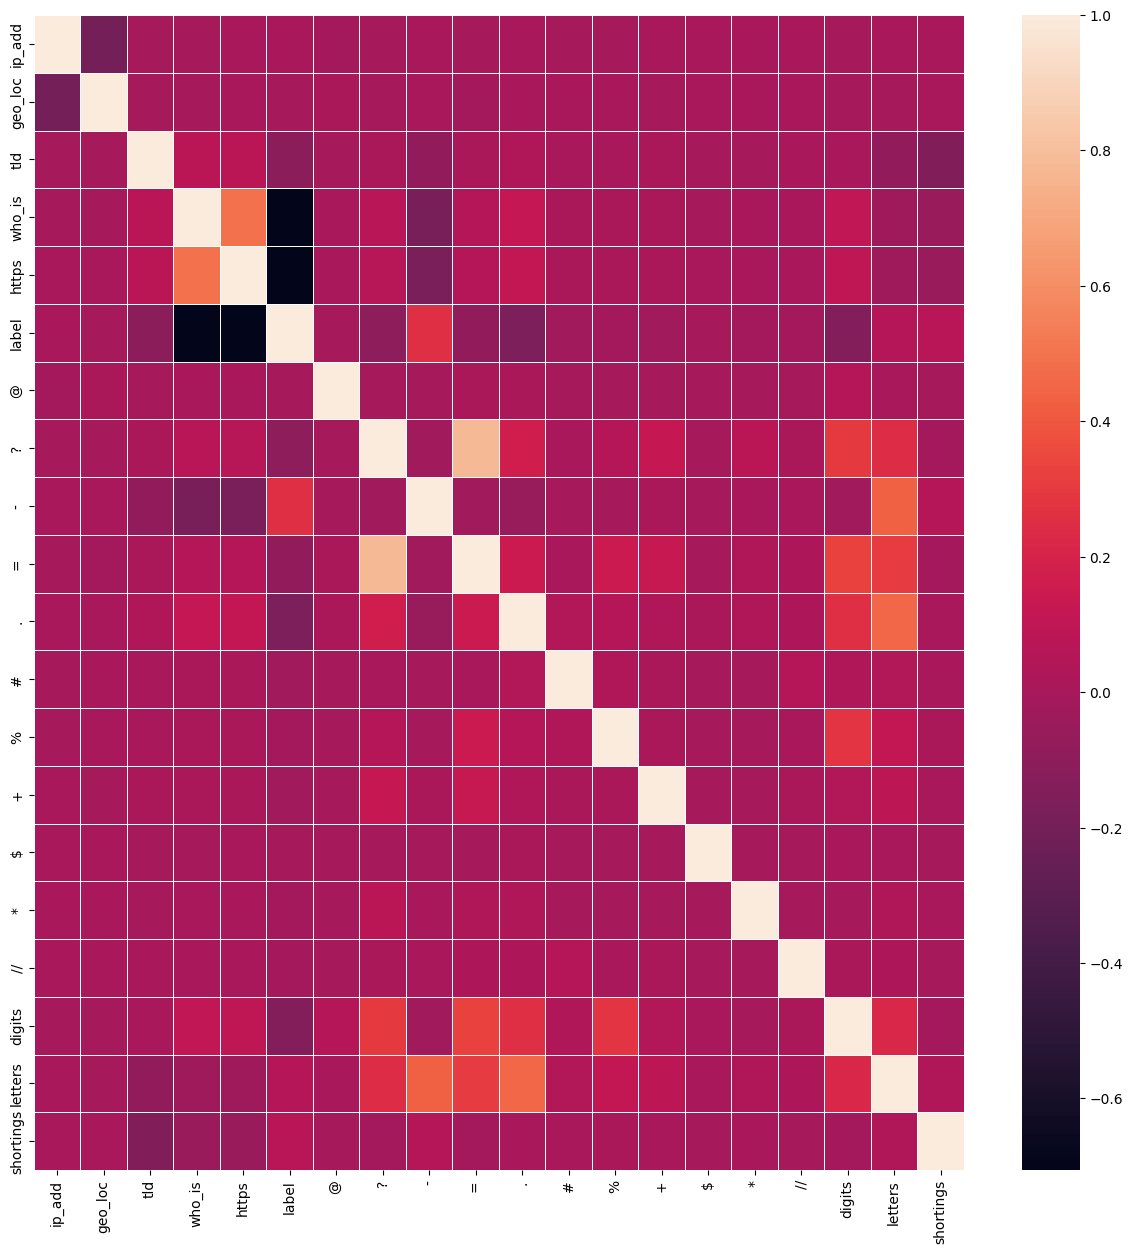

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), linewidths=.5)

In [ ]:
data.head()

,url,ip_add,geo_loc,tld,who_is,https,label,@,?,-,...,.,#,%,+,$,*,//,digits,letters,shortings
0,http://baycu.com/,431640155,179,72,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,12,0
1,http://massagefree.com/,3329188944,180,72,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,18,0
2,http://bucksbrand.com/,2503270191,180,72,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,17,0
3,http://sheridantaylor.com/,3615659636,180,72,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,21,0
4,http://eze-porn.com/pussy-pounding/,204728603,180,72,0,0,1,0,0,2,...,1,0,0,0,0,0,1,0,27,0


In [ ]:
data = data.drop('url', axis=1)

In [ ]:
data.columns.tolist()

In [ ]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/SafeNetAI/Dataset/data_featured.csv', index=False)

## Select Best Model to Train

In [ ]:
import os

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SafeNetAI/Dataset/data_featured.csv')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = data.drop(['label'],axis=1)#,'type_code'
y = data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle

In [ ]:
models = [RandomForestClassifier]

accuracy_test=[]
for m in models:
    model_name = m.__name__
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

    # Export the model to a file
    directory = "/content/drive/MyDrive/Colab Notebooks/SafeNetAI/"
    filename = os.path.join(directory, f'safenet_ai_model_{model_name}.pkl')
    pickle.dump(model_, open(filename, 'wb'))

In [ ]:
# Create a DataFrame with model names and accuracies
output = pd.DataFrame({"Model": [m.__name__ for m in models], "Accuracy": accuracy_test})
output.to_csv('/content/drive/MyDrive/Colab Notebooks/SafeNetAI/model_performance.csv', index=False)

In [ ]:
# Find the model with the highest accuracy
highest_accuracy_index = output['Accuracy'].argmax()
highest_accuracy_model = output.loc[highest_accuracy_index, 'Model']

print("Model with the highest accuracy:", highest_accuracy_model)

Model with the highest accuracy: RandomForestClassifier


# Predict

In [ ]:
import socket
import whois
import pandas as pd
from sklearn import preprocessing

In [ ]:
model_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SafeNetAI/model_performance.csv')
highest_accuracy_index = model_data['Accuracy'].argmax()
highest_accuracy_model = model_data.loc[highest_accuracy_index, 'Model']

In [ ]:
def get_ip_address(domain):
    try:
        ip = socket.gethostbyname(domain)
        # Convert IP address to numerical representation
        ip = sum(int(digit) * (256 ** i) for i, digit in enumerate(ip.split('.')[::-1]))
        return ip
    except socket.gaierror:
        return None

In [ ]:
import geocoder

In [ ]:
def get_geo_location(domain):
    try:
        ip = socket.gethostbyname(domain)
        g = geocoder.ip(ip)
        if g and g.country:
            country_name = g.country

            label_encoder = preprocessing.LabelEncoder()
            country_name = label_encoder.fit_transform([country_name])[0]
            return country_name
        else:
            return None
    except socket.gaierror:
        return None


In [ ]:
def get_tld_from_domain(domain):
  # Extracting top-level domain
  tld = domain.split(".")[-1]
  label_encoder = preprocessing.LabelEncoder()
  tld = label_encoder.fit_transform([tld])[0]

  return tld

In [ ]:
REQUIRED_WHOIS_FIELDS = ['domain_name', 'registrar', 'registrant_name', 'creation_date', 'expiration_date']

def get_whois(domain):
    try:
        whois_data = whois.whois(domain)
        return whois_data
    except whois.parser.PywhoisError:
        return None

def is_whois_complete(whois_data):
    if whois_data is None:
        return 0

    for field in REQUIRED_WHOIS_FIELDS:
        if field not in whois_data:
            return 0

    return 1

In [ ]:
# Finding https_status
import http.client
def check_https(url):
  https_status= 0
  
  try:
    conn = http.client.HTTPSConnection(url)
    conn.request("HEAD", "/")
    res = conn.getresponse()
    if res.status == 200 or res.status==301 or res.status==302:
        https_status= 1   
  
  except Exception as msg:
    https_status= 0
    
  finally:
    return https_status

In [ ]:
def count_features(domain):
  features = ['@', '?', '-', '=', '.', '#', '%', '+', '$', '*', '//']
  data = []

  for feature in features:
    data.append(domain.count(feature))

  return data

In [ ]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [ ]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [ ]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

In [ ]:
import socket
import requests
import re
import whois

In [ ]:
def generate_info(domain):
    # Extracting IP address
    ip_add = get_ip_address(domain)

    # Extracting geographical location
    geo_loc = get_geo_location(domain)

    tld = get_tld_from_domain(domain)

    # Extracting WHOIS information
    who_is = is_whois_complete(domain)

    # Checking if HTTPS is supported
    https = check_https(domain)

    features = count_features(domain)
    # Generating random digits and letters
    digits = digit_count(domain)
    letters = letter_count(domain)

    sh_services = Shortining_Service(domain)

    # Returning the generated information
    return [ip_add, geo_loc, tld, who_is, https, features, digits, letters, sh_services]

In [ ]:
def predict_url_type(url):
  data = generate_info(url)

  flattened_data = []
  for item in data:
    if isinstance(item, list):
      flattened_data.extend(item)
    else:
      flattened_data.append(item)

  return flattened_data

In [ ]:
data_url = predict_url_type("google.com")

In [ ]:
column_names = ['ip_add', 'geo_loc', 'tld', 'who_is', 'https', '@', '?', '-', '=', '.', '#', '%', '+', '$', '*', '//', 'digits', 'letters', 'shortings']

df = pd.DataFrame([data_url], columns=column_names)

In [ ]:
df

,ip_add,geo_loc,tld,who_is,https,@,?,-,=,.,#,%,+,$,*,//,digits,letters,shortings
0,2902277771,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,9,0


In [ ]:
file_location = f"/content/drive/MyDrive/Colab Notebooks/SafeNetAI/safenet_ai_model_{highest_accuracy_model}.pkl"

In [ ]:
model_ = pickle.load(open(file_location, 'rb'))

In [ ]:
print(model_.predict(df)[0])

0
